In [1]:
# Bibliotecas necessárias
import pandas as pd
from google.colab import files  # Caso esteja no Google Colab

# Solicitar o upload do arquivo
print("Faça o upload do arquivo CSV contendo os dados.")
uploaded = files.upload()

# Carregar o arquivo em um DataFrame do Pandas
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Exibir as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
print("Dados carregados com sucesso:")
print(data.head())


Faça o upload do arquivo CSV contendo os dados.


Saving Analysis.csv to Analysis.csv
Dados carregados com sucesso:
   Unnamed: 0                 Genotypes  PruningBiomass  TimeofBudbrust  \
0           0  (Gulabi X B’lore Purple)        0.327667        9.000000   
1           1                     Alden        2.137667       10.000000   
2           2                     Aledo        0.912667       10.666667   
3           3               Amber Sweet        0.528667       10.000000   
4           4               Arka Chitra        1.075667       10.000000   

   Timeoffullbloom  Time of verasion         ABW          BW         BD  \
0        38.333333        105.000000  558.676667  104.800000  16.900000   
1        35.333333        102.666667  262.866667  182.776667  15.523333   
2        39.666667        109.000000  124.340000  176.866667  21.333333   
3        36.333333         99.333333   85.626667  137.363333  15.166667   
4        35.000000        102.666667  317.273333  237.713333  18.766667   

          BL        TSS   Acidit

**Remover colunas irrelevantes:**

In [2]:
# Verificar as colunas no dataset
print("Colunas do dataset:")
print(data.columns)

Colunas do dataset:
Index(['Unnamed: 0', 'Genotypes', 'PruningBiomass', 'TimeofBudbrust',
       'Timeoffullbloom', 'Time of verasion', 'ABW', 'BW', 'BD', 'BL', 'TSS',
       'Acidity', 'Compaactness', 'Skinfirmness', 'Bunlen', 'pedunclelength',
       'Physiologicalmaturity', 'Seed weight ', 'NOS'],
      dtype='object')


In [3]:
# Remover colunas irrelevantes
# Por exemplo, 'Unnamed: 0' pode ser removida se for apenas um índice
data_cleaned = data.drop(columns=['Unnamed: 0'], errors='ignore')

In [4]:
# Conferir as colunas restantes
print("\nColunas restantes após remoção:")
print(data_cleaned.columns)


Colunas restantes após remoção:
Index(['Genotypes', 'PruningBiomass', 'TimeofBudbrust', 'Timeoffullbloom',
       'Time of verasion', 'ABW', 'BW', 'BD', 'BL', 'TSS', 'Acidity',
       'Compaactness', 'Skinfirmness', 'Bunlen', 'pedunclelength',
       'Physiologicalmaturity', 'Seed weight ', 'NOS'],
      dtype='object')


**One-Hot Encoding:** transformar as variáveis categóricas em colunas binárias e adicionar essas novas colunas ao lado das originais

In [5]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


In [7]:
# Selecionar a coluna categórica
categorical_col = 'Genotypes'

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicar o encoder à coluna categórica
encoded = encoder.fit_transform(data_cleaned[[categorical_col]])

# Obter os nomes das colunas codificadas
encoded_col_names = encoder.get_feature_names_out([categorical_col])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoded_col_names)

# Adicionar as colunas codificadas ao DataFrame original
data_cleaned_with_encoded = pd.concat([data_cleaned, encoded_df], axis=1)

# Exibir as primeiras linhas do DataFrame atualizado
print("Dados atualizados com colunas codificadas:")
print(data_cleaned_with_encoded.head())


Dados atualizados com colunas codificadas:
                  Genotypes  PruningBiomass  TimeofBudbrust  Timeoffullbloom  \
0  (Gulabi X B’lore Purple)        0.327667        9.000000        38.333333   
1                     Alden        2.137667       10.000000        35.333333   
2                     Aledo        0.912667       10.666667        39.666667   
3               Amber Sweet        0.528667       10.000000        36.333333   
4               Arka Chitra        1.075667       10.000000        35.000000   

   Time of verasion         ABW          BW         BD         BL        TSS  \
0        105.000000  558.676667  104.800000  16.900000  18.233333  18.533333   
1        102.666667  262.866667  182.776667  15.523333  17.666667  18.656667   
2        109.000000  124.340000  176.866667  21.333333  23.666667  18.090000   
3         99.333333   85.626667  137.363333  15.166667  17.600000  18.010000   
4        102.666667  317.273333  237.713333  18.766667  21.266667  16.943333

**Separar as variáveis preditoras (X) e a variável alvo (y)**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Definir a variável alvo (exemplo: 'Skinfirmness')
target_col = 'Skinfirmness'

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = data_cleaned_with_encoded.drop(columns=[target_col])  # Remove a variável alvo
y = data_cleaned_with_encoded[target_col]  # Define a variável alvo

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar os tamanhos das divisões
print(f"Tamanho do conjunto de treino: {X_train.shape}, {y_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}, {y_test.shape}")

Tamanho do conjunto de treino: (60, 92), (60,)
Tamanho do conjunto de teste: (15, 92), (15,)


**Regressão Linear**

In [12]:
print("Colunas não numéricas em X_train:")
print(X_train.select_dtypes(include=['object']).columns)


Colunas não numéricas em X_train:
Index(['Genotypes'], dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecionar a coluna categórica
categorical_col = 'Genotypes'

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar o encoder em todo o dataset
encoded = encoder.fit_transform(data_cleaned_with_encoded[[categorical_col]])
encoded_col_names = encoder.get_feature_names_out([categorical_col])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoded_col_names, index=data_cleaned_with_encoded.index)

# Remover a coluna original e adicionar as colunas codificadas
data_cleaned_encoded = pd.concat([data_cleaned_with_encoded.drop(columns=[categorical_col]), encoded_df], axis=1)

# Dividir os dados em treino e teste
X = data_cleaned_encoded.drop(columns=['Skinfirmness'])  # Substitua 'Skinfirmness' pela variável alvo correta
y = data_cleaned_encoded['Skinfirmness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as colunas em X_train e X_test
print("Colunas em X_train:", X_train.columns)
print("Colunas em X_test:", X_test.columns)


Colunas em X_train: Index(['PruningBiomass', 'TimeofBudbrust', 'Timeoffullbloom',
       'Time of verasion', 'ABW', 'BW', 'BD', 'BL', 'TSS', 'Acidity',
       ...
       'Genotypes_VP X Beauty Seedless', 'Genotypes_VP X Centennial Seedless',
       'Genotypes_Vermentno', 'Genotypes_Viognier', 'Genotypes_Waltham Cross',
       'Genotypes_ E-8-25', 'Genotypes_ SV-12309', 'Genotypes_ SV-12364',
       'Genotypes_ SV-18402', 'Genotypes_ SV-23501'],
      dtype='object', length=166)
Colunas em X_test: Index(['PruningBiomass', 'TimeofBudbrust', 'Timeoffullbloom',
       'Time of verasion', 'ABW', 'BW', 'BD', 'BL', 'TSS', 'Acidity',
       ...
       'Genotypes_VP X Beauty Seedless', 'Genotypes_VP X Centennial Seedless',
       'Genotypes_Vermentno', 'Genotypes_Viognier', 'Genotypes_Waltham Cross',
       'Genotypes_ E-8-25', 'Genotypes_ SV-12309', 'Genotypes_ SV-12364',
       'Genotypes_ SV-18402', 'Genotypes_ SV-23501'],
      dtype='object', length=166)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inicializar o modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de desempenho
print("Métricas do Modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Métricas do Modelo:
Mean Squared Error (MSE): 93.82911777711196
Mean Absolute Error (MAE): 8.308094166113701
R² Score: -0.8262491083755581


Os resultados das métricas indicam que o modelo de Regressão Linear não está se ajustando bem aos dados, considerando que:

Mean Squared Error (MSE) e Mean Absolute Error (MAE) são altos. Esses valores refletem a magnitude do erro nas previsões.
R² Score negativo (-0.826) significa que o modelo está performando pior do que um modelo que simplesmente prevê a média do conjunto de teste.

**Normalizar as Variáveis Preditivas**

In [18]:
# Importar bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar as variáveis preditoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmar as dimensões dos dados normalizados
print("Dimensões do conjunto de treino (normalizado):", X_train_scaled.shape)
print("Dimensões do conjunto de teste (normalizado):", X_test_scaled.shape)

# Iniciar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Treinar o modelo
rf_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Exibir as métricas de desempenho
print("\nMétricas do Modelo Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R² Score: {r2_rf}")


Dimensões do conjunto de treino (normalizado): (60, 166)
Dimensões do conjunto de teste (normalizado): (15, 166)

Métricas do Modelo Random Forest:
Mean Squared Error (MSE): 55.763780225111
Mean Absolute Error (MAE): 6.412384444444439
R² Score: -0.08536194657263807


**MSE (Mean Squared Error):**

O valor de 55.76 indica o erro médio quadrático entre as previsões e os valores reais. É uma melhora significativa em relação ao MSE do modelo de regressão linear (93.83).

**MAE (Mean Absolute Error):**

O erro médio absoluto de 6.41 mostra a diferença média em unidades entre os valores previstos e os valores reais, que também melhorou em relação ao modelo anterior (8.31).

**R² Score:**

Um valor negativo (-0.085) ainda sugere que o modelo está apresentando desempenho inferior ao esperado. Em vez de explicar a variabilidade dos dados, o modelo pode estar apenas aproximando os valores médios ou apresentando alta variância.

**Ajustar Hiperparâmetros do Random Forest**

**Grid Search:**

Explorar combinações de hiperparâmetros como:
n_estimators: Número de árvores.

max_depth: Profundidade máxima de cada árvore.

min_samples_split e min_samples_leaf: Critérios para dividir nós e tamanho mínimo de folhas.

**Métrica de Avaliação:**

Usar validação cruzada com a métrica R² para encontrar a melhor combinação de parâmetros.

**Testar no Conjunto de Teste:**

Avaliar o modelo otimizado no conjunto de teste para verificar se houve melhora.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir o modelo base
rf = RandomForestRegressor(random_state=42)

# Definir os hiperparâmetros a serem explorados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

# Ajustar o modelo ao conjunto de treino
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Avaliar o modelo otimizado no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test_scaled)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred_optimized)
mae = mean_absolute_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)

print("\nMétricas do Modelo Otimizado:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Métricas do Modelo Otimizado:
Mean Squared Error (MSE): 59.957286317816134
Mean Absolute Error (MAE): 6.409614048828872
R² Score: -0.16698252389664603


**Melhores Hiperparâmetros Identificados:**

max_depth: None (árvore sem profundidade máxima definida, permitindo crescimento total).

min_samples_leaf: 4 (mínimo de 4 amostras por folha).

min_samples_split: 10 (mínimo de 10 amostras para dividir um nó).

n_estimators: 200 (200 árvores na floresta).

**Métricas de Desempenho:**

MSE: 59.96 (indica o erro quadrado médio; valores menores são melhores).

MAE: 6.41 (erro absoluto médio, representando o desvio médio entre os valores previstos e reais).

R² Score: -0.1669 (indica que o modelo não conseguiu explicar bem a variância dos dados, um valor negativo sugere que o modelo é inferior a uma simples média).

**Gradient Boosting:**

In [20]:
# Gradient Boosting Model Implementation

# Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training set
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the metrics
print("Métricas do Modelo Gradient Boosting:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"R² Score: {r2_gb}")

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_gb.fit(X_train_scaled, y_train)

# Display the best parameters
print("\nMelhores Hiperparâmetros do Gradient Boosting:")
print(grid_search_gb.best_params_)

# Evaluate the optimized model
optimized_gb_model = grid_search_gb.best_estimator_
y_pred_optimized_gb = optimized_gb_model.predict(X_test_scaled)

# Calculate metrics for the optimized model
mse_optimized_gb = mean_squared_error(y_test, y_pred_optimized_gb)
mae_optimized_gb = mean_absolute_error(y_test, y_pred_optimized_gb)
r2_optimized_gb = r2_score(y_test, y_pred_optimized_gb)

# Display the metrics for the optimized model
print("\nMétricas do Modelo Gradient Boosting Otimizado:")
print(f"Mean Squared Error (MSE): {mse_optimized_gb}")
print(f"Mean Absolute Error (MAE): {mae_optimized_gb}")
print(f"R² Score: {r2_optimized_gb}")


Métricas do Modelo Gradient Boosting:
Mean Squared Error (MSE): 67.90489306211143
Mean Absolute Error (MAE): 6.698559658387517
R² Score: -0.32167128229430175
Fitting 3 folds for each of 243 candidates, totalling 729 fits

Melhores Hiperparâmetros do Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}

Métricas do Modelo Gradient Boosting Otimizado:
Mean Squared Error (MSE): 36.09262341531378
Mean Absolute Error (MAE): 5.025903470369985
R² Score: 0.2975088875105012


Os resultados indicam que houve uma melhoria significativa no desempenho do modelo após a otimização dos hiperparâmetros. Vamos analisar o que isso significa:

**Interpretação dos Resultados**

**Antes da Otimização (Gradient Boosting Padrão):**

MSE: 67.90

MAE: 6.70

R²: -0.32

Um R² negativo indica que o modelo inicial não estava capturando bem a variação dos dados, e a predição era pior do que usar apenas a média dos valores reais como predição.

**Após a Otimização (Gradient Boosting Ajustado):**

MSE: 36.09 (redução significativa, indicando erros quadrados menores).

MAE: 5.03 (melhora em relação ao erro absoluto médio).

R²: 0.30 (positivo, o modelo agora explica aproximadamente 30% da variação nos dados).

O modelo otimizado está claramente capturando melhor a relação entre as variáveis independentes e a variável-alvo.

**Visualziação do Desempenho do Modelo:**

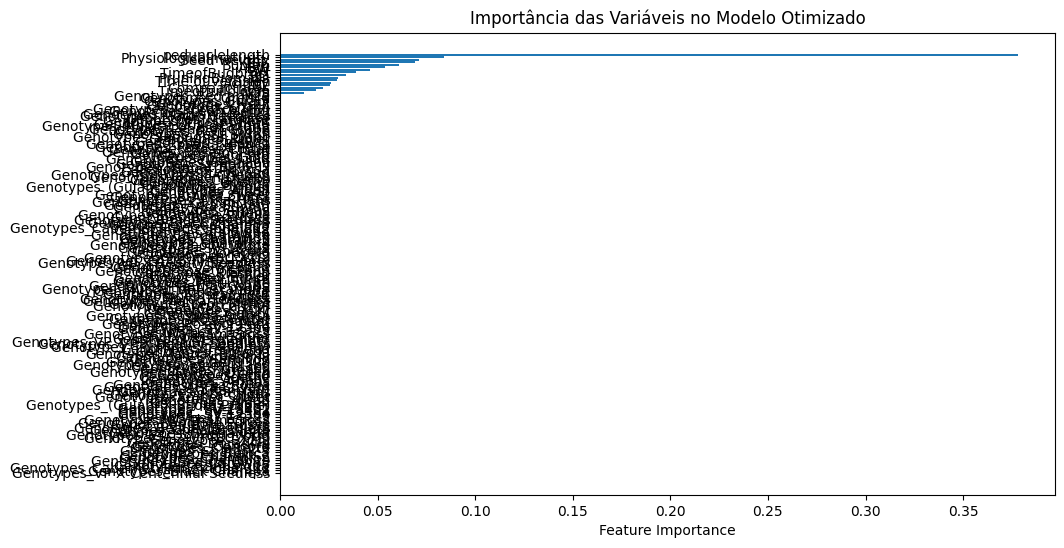

Métricas do Modelo Otimizado:
Mean Squared Error (MSE): 110.2555153593537
Mean Absolute Error (MAE): 8.3595097378558
R² Score: -1.145965361166641


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [22]:
# Avaliação e Importância das Variáveis no Modelo Otimizado

# Usar o melhor modelo do GridSearchCV
best_model = grid_search.best_estimator_

# Identificar variáveis mais importantes
importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Plotar as importâncias das variáveis
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Importância das Variáveis no Modelo Otimizado")
plt.gca().invert_yaxis()
plt.show()

# Avaliar novamente o modelo otimizado
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Métricas do Modelo Otimizado:")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"R² Score: {r2_optimized}")


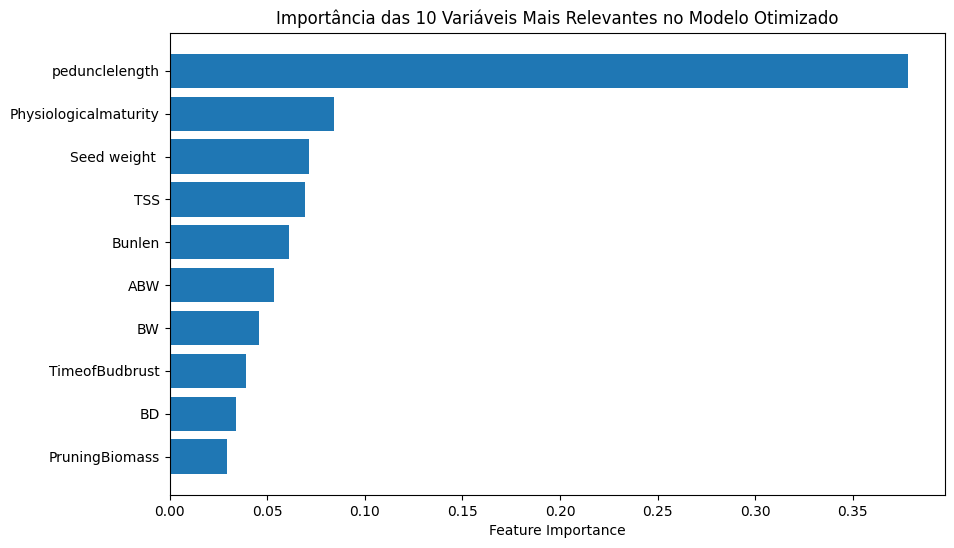

In [23]:
# Mostrar apenas as 10 variáveis mais importantes
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[sorted_idx[:top_n]], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]])
plt.xlabel("Feature Importance")
plt.title("Importância das 10 Variáveis Mais Relevantes no Modelo Otimizado")
plt.gca().invert_yaxis()
plt.show()
